<a href="https://colab.research.google.com/github/Utkarsh-3108/Utkarsh-3108/blob/main/Minor_project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Useful Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
!pip install streamlit
import streamlit as st
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


## Data Collection and Data Pre-processing

In [ ]:
# Read the data set values of Gold and Silver stocks.
gld=pd.read_csv('/content/Stock analysis.csv')

In [ ]:
gld.head(29)
# GLD- gold price (oz) SLV- silver price (oz) USD- exchange rate to USD (United State Dollar)
#SPX- SPX — is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.


,Date,SPX,GLD,SLV,EUR/USD
0,24-02-2025,5861.57,2965.5,31.730,106.61
1,25-02-2025,5955.25,2923.6,32.160,106.18
2,26-02-2025,5956.06,2933.3,32.170,106.46
3,27-02-2025,5861.57,2902.6,31.770,107.18
4,28-02-2025,5954.51,2857.6,31.210,107.52
5,01-03-2025,5921.08,2870.5,31.350,107.02
6,02-03-2025,5892.43,2896.2,31.670,106.87
7,03-03-2025,5849.72,2908.5,31.950,106.46
8,04-03-2025,5778.15,2927.9,32.010,105.54
9,05-03-2025,5842.63,2935.2,32.840,104.25


In [ ]:
#Describing the data and its statistical values
gld.describe()

,SPX,GLD,SLV,EUR/USD
count,29.000000,29.000000,29.000000,29.000000
mean,5743.142069,2963.548276,32.863379,104.606897
std,123.188514,59.159642,0.919081,1.455637
min,5521.520000,2857.600000,31.210000,102.890000
25%,5662.890000,2920.500000,32.160000,103.580000
50%,5720.840000,2936.500000,32.960000,103.910000
75%,5849.720000,3016.400000,33.680000,106.180000
max,5956.060000,3053.700000,34.300000,107.520000


In [ ]:
#Information about dataset
gld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     29 non-null     object 
 1   SPX      29 non-null     float64
 2   GLD      29 non-null     float64
 3   SLV      29 non-null     float64
 4   EUR/USD  29 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


# Dimensions of Data

In [ ]:
gld.shape

(29, 5)

# Correlation

In [ ]:
#Finding the correlation.
correlation = gld.corr(numeric_only=True)

<Axes: >

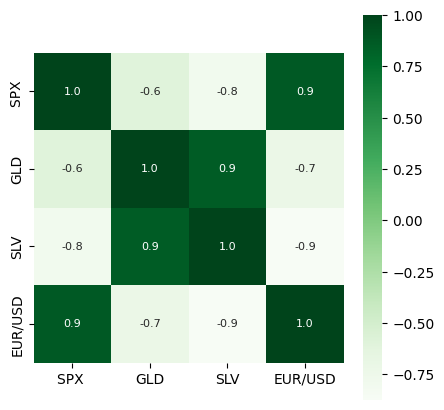

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [ ]:
print(correlation['GLD'])

SPX       -0.600365
GLD        1.000000
SLV        0.857451
EUR/USD   -0.709992
Name: GLD, dtype: float64


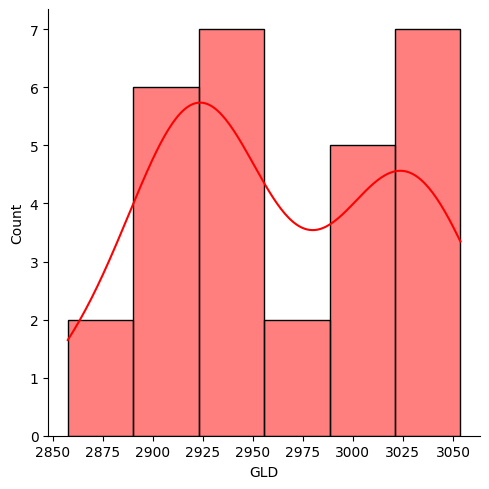

In [ ]:
#Finding the distribution plot to see distribtion of gold prices
sns.displot(gld['GLD'],kde=True ,color='red')

# Splitting the target and Features

In [ ]:
a1=gld.drop(['Date','GLD'],axis=1)
a2=gld['GLD']

In [ ]:
#
print(a1)

       SPX      SLV  EUR/USD
0   5861.57  31.730   106.61
1   5955.25  32.160   106.18
2   5956.06  32.170   106.46
3   5861.57  31.770   107.18
4   5954.51  31.210   107.52
5   5921.08  31.350   107.02
6   5892.43  31.670   106.87
7   5849.72  31.950   106.46
8   5778.15  32.010   105.54
9   5842.63  32.840   104.25
10  5738.52  32.990   104.18
11  5770.21  32.590   103.82
12  5731.25  32.470   103.87
13  5692.38  32.410   103.91
14  5614.56  32.350   103.94
15  5572.07  32.960   103.39
16  5599.30  33.540   103.54
17  5521.52  33.980   103.51
18  5638.54  34.050   103.71
19  5649.23  34.047   103.62
20  5668.36  34.041   103.58
21  5675.12  34.040   103.47
22  5614.66  34.300   102.89
23  5675.29  33.820   103.09
24  5662.89  33.680   103.43
25  5667.56  33.230   103.82
26  5698.28  33.220   103.86
27  5720.84  33.230   103.92
28  5767.57  33.230   103.96


In [ ]:
#Displaying the gold values.
print(a2)

0     2965.5
1     2923.6
2     2933.3
3     2902.6
4     2857.6
5     2870.5
6     2896.2
7     2908.5
8     2927.9
9     2935.2
10    2936.5
11    2923.7
12    2920.5
13    2916.5
14    2910.3
15    2932.8
16    2957.1
17    2997.8
18    3008.2
19    3011.5
20    3013.4
21    3016.4
22    3050.4
23    3050.9
24    3053.7
25    3033.4
26    3031.7
27    3029.5
28    3027.7
Name: GLD, dtype: float64


# Splitting the Training data and Testing data

In [ ]:
a1_train, a1_test, a2_train, a2_test=train_test_split(a1,a2,test_size=0.2,random_state=42)

# **Model Training**
* **RANDOM FOREST REGRESSION**

In [ ]:
regressor1_rf= RandomForestRegressor(n_estimators=100)

In [ ]:
#Training the model
regressor1_rf.fit(a1_train,a2_train)

RandomForestRegressor()

# Model Prediction

In [ ]:
test_data_prediction1=regressor1_rf.predict(a1_test)
Pred=regressor1_rf.predict(a1)
value=r2_score(a2,Pred)

In [ ]:
print(Pred)

[2944.257 2924.649 2929.197 2905.998 2868.398 2878.419 2910.5   2914.766
 2915.08  2936.171 2947.55  2923.073 2923.054 2918.063 2915.787 2948.636
 3036.463 3002.821 3009.767 3011.123 3014.749 3015.923 3018.061 3045.786
 3046.55  3031.867 3029.682 3026.794 3025.505]


# R-squared error

In [ ]:
error_score_r2=r2_score(a2_test,test_data_prediction1)
print("R squared error : ",error_score_r2)

R squared error :  0.5178662201063031


# Comparision of predicted values and actual values

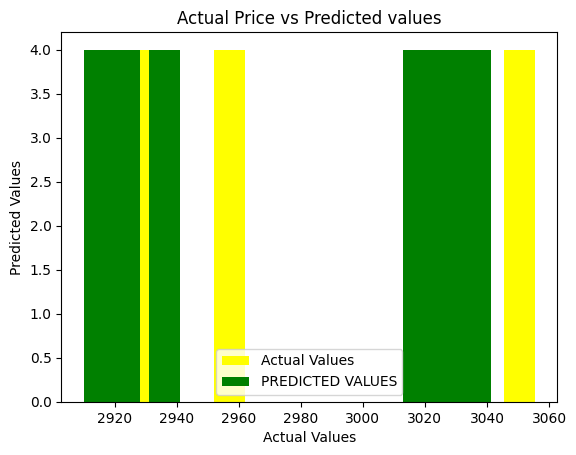

In [ ]:
a2_test=list(a2_test)
plt.bar(a2_test, color="yellow", label="Actual Values", height=4, width=10)
plt.bar(test_data_prediction1, color="green", label="PREDICTED VALUES",height=4, width=10)
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Price vs Predicted values")
plt.legend()
plt.show()

# Frontened Web Application

In [ ]:
st.title('Gold Price Prediction Model')
img_1=Image.open('/content/gold_image_analysis.jfif')
st.image(img_1,width=400, use_container_width=True)

st.subheader('Using RandomForestRegressor')
st.write(gld)
st.subheader('Model performance')
st.write(value)

2025-04-24 06:48:44.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:48:44.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

# Silver Price Prediction

In [ ]:
print(correlation['SLV'])

SPX       -0.796153
GLD        0.857451
SLV        1.000000
EUR/USD   -0.875116
Name: SLV, dtype: float64


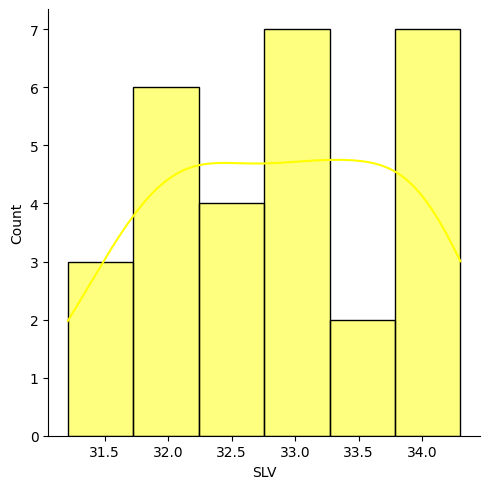

In [ ]:
#Finding the distribution plot to see distribtion of gold prices
sns.displot(gld['SLV'],kde=True ,color='yellow')

In [ ]:
a3=gld.drop(['Date','SLV'],axis=1)
a4=gld['SLV']

In [ ]:
print(a4)

0     31.730
1     32.160
2     32.170
3     31.770
4     31.210
5     31.350
6     31.670
7     31.950
8     32.010
9     32.840
10    32.990
11    32.590
12    32.470
13    32.410
14    32.350
15    32.960
16    33.540
17    33.980
18    34.050
19    34.047
20    34.041
21    34.040
22    34.300
23    33.820
24    33.680
25    33.230
26    33.220
27    33.230
28    33.230
Name: SLV, dtype: float64


# Splitting the target and Features

In [ ]:
a3_train, a3_test, a4_train, a4_test=train_test_split(a3,a4,test_size=0.2,random_state=42)

# Model Training


*   Random forest regression.


In [ ]:
regressor2_rf= RandomForestRegressor(n_estimators=100)

In [ ]:
#Training the model
regressor2_rf.fit(a3_train,a4_train)

RandomForestRegressor()

# Model Prediction

In [ ]:
test_data_prediction2=regressor2_rf.predict(a3_test)
Pred2=regressor2_rf.predict(a3)
value2=r2_score(a4,Pred2)

In [ ]:
print(Pred2)

[32.0365  32.1096  32.1764  31.745   31.358   31.4453  31.6577  32.0248
 32.3262  32.5716  32.845   32.6152  32.5581  32.4765  32.4669  32.95587
 33.09329 33.96598 34.00641 34.04441 34.00768 33.96265 33.76693 33.74547
 33.73847 33.38483 33.25931 33.18481 33.1713 ]


# R squared Error

In [ ]:
error_score_r3=r2_score(a4_test,test_data_prediction2)
print("R squared error : ",error_score_r3)

R squared error :  0.7980616869908331


# Comparision of predicted and Actual Values

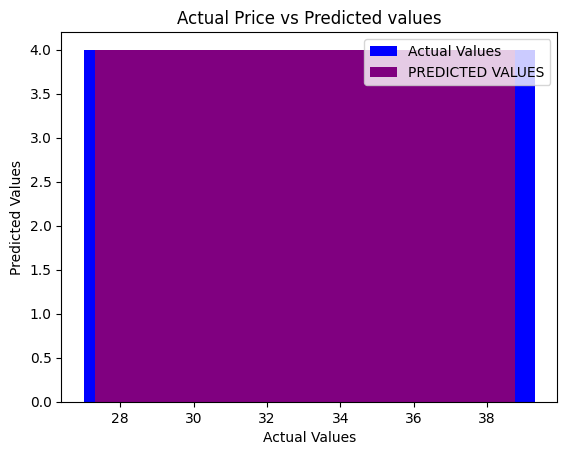

In [ ]:
a4_test=list(a4_test)
plt.bar(a4_test, color="blue", label="Actual Values", height=4, width=10)
plt.bar(test_data_prediction2, color="purple", label="PREDICTED VALUES",height=4, width=10)
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Price vs Predicted values")
plt.legend()
plt.show()

In [ ]:
st.title('Silver Price Prediction Model')
img_2=Image.open('/content/1c285766680db0f17b3a02069769dc8e.jpg')
st.image(img_2,width=400, use_container_width=True)

st.subheader('Using RandomForestRegressor')
st.write(gld)
st.subheader('Model performance')
st.write(value2)

2025-04-24 06:50:42.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 06:50:42.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

#By opening the python terminal and execute the below code we can find its frontened web application

*python -m streamlit run d:\code\minor_2\minor_code.py*